# 6.4 Supervised Machine Learning

This script contains the following points:

1) Importing Libraries and data
2) Data Cleaning
3) Data Prep for regression analysis
4) Regression analysis

<font size="4"> 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensuring graphs are displayed within the notebook with this function

%matplotlib inline

In [3]:
# Define Path

path=r'C:\Users\dell\Desktop\Career Foundry\6.0 Immersion - Project Folder'

In [4]:
# Importing cleaned data at state level with estimated populations

df_state_pop=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_state_pop.pkl'))

<font size="4"> 2. Data Cleaning

In [5]:
df_state_pop.shape

(74511, 28)

In [6]:
df_state_pop.columns

Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month', 'Year',
       'State Name', 'Population Estimate', 'Trip_Pop%', 'Home_Pop%',
       'NotHome_Pop%'],
      dtype='object')

In [7]:
# Missing values check

df_state_pop.isnull().sum()

Level                                 0
Date                                  0
State FIPS                            0
State Postal Code                     0
County FIPS                       74511
County Name                       74511
Population Staying at Home            0
Population Not Staying at Home        0
Number of Trips                       0
Number of Trips <1                    0
Number of Trips 1-3                   0
Number of Trips 3-5                   0
Number of Trips 5-10                  0
Number of Trips 10-25                 0
Number of Trips 25-50                 0
Number of Trips 50-100                0
Number of Trips 100-250               0
Number of Trips 250-500               0
Number of Trips >=500                 0
Row ID                                0
Week                                  0
Month                                 0
Year                                  0
State Name                            0
Population Estimate                   0


Only missing values are at County level data. No issues to correct.

In [8]:
# Duplicate loan check

dups = df_state_pop.duplicated()

In [9]:
dups.shape

(74511,)

No duplicates found.

C:\Users\dell\AppData\Local\Temp\ipykernel_3840\3947794742.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_state_pop['Population Estimate'],bins=25)


<Axes: xlabel='Population Estimate', ylabel='Density'>

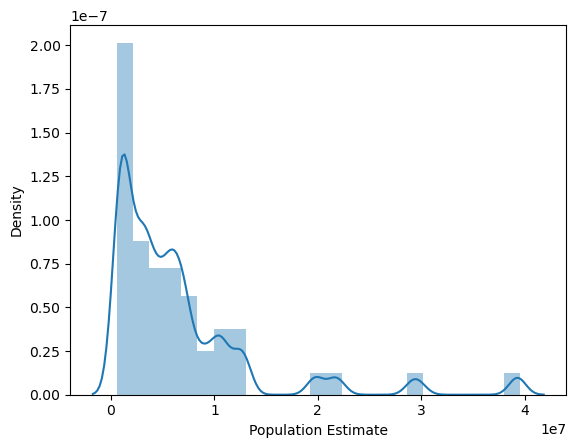

In [10]:
# Review for outliers

sns.distplot(df_state_pop['Population Estimate'],bins=25)

Highest density at lower population estimates with right skewed distribution

In [11]:
# Checking mean

df_state_pop['Population Estimate'].mean()

6495445.166512327

In [12]:
# Checking median

df_state_pop['Population Estimate'].median()

4507445.0

Lower median is not unexpected given states with larger populations impacting the mean.

In [13]:
# Checking max value

df_state_pop['Population Estimate'].max()

39512223

C:\Users\dell\AppData\Local\Temp\ipykernel_3840\302816752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_state_pop['Population Not Staying at Home'],bins=25)


<Axes: xlabel='Population Not Staying at Home', ylabel='Density'>

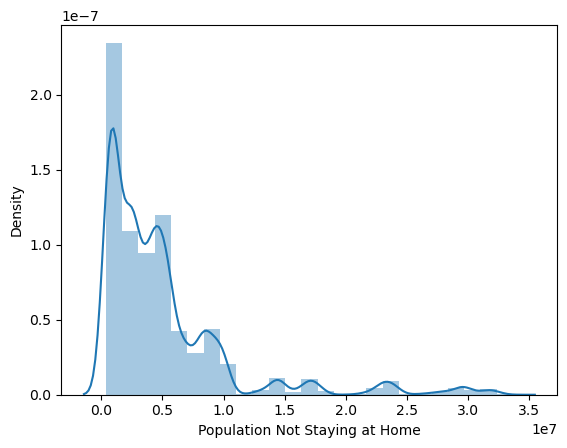

In [14]:
sns.distplot(df_state_pop['Population Not Staying at Home'],bins=25)

In [15]:
# Checking mean

df_state_pop['Population Not Staying at Home'].mean()

5000189.9592946

In [16]:
# Checking median

df_state_pop['Population Not Staying at Home'].median()

3530373.0

In [17]:
# Checking max value

df_state_pop['Population Not Staying at Home'].max()

33675879.0

<font size="4"> 3. Data Prep for regression analysis

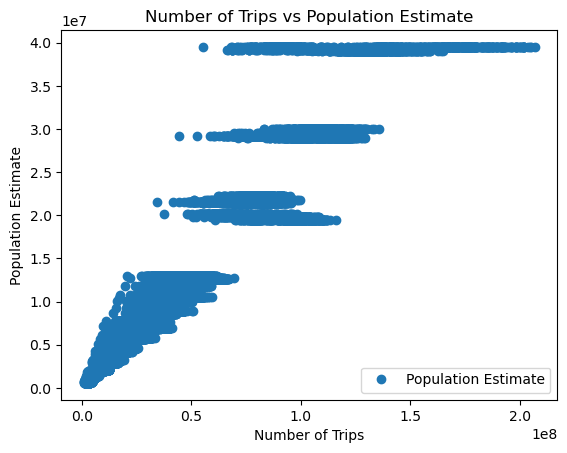

In [18]:
# Create a scatterplot for comparison of estimated population and total number of trips.

df_state_pop.plot(x = 'Number of Trips', y='Population Estimate',style='o') 
plt.title('Number of Trips vs Population Estimate')  
plt.xlabel('Number of Trips')  
plt.ylabel('Population Estimate')  
plt.show()

The scatterplot is displaying above values due to Population Estimate being a single yearly average and Number of Trips being a daily number.

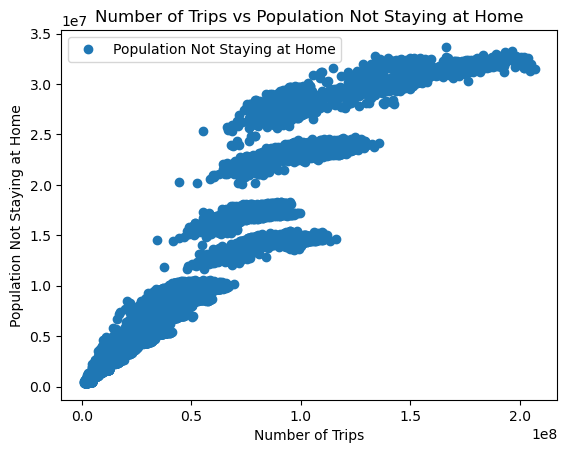

In [19]:
# Create a scatterplot for comparison of Population Not Staying at Home and total number of trips.

df_state_pop.plot(x = 'Number of Trips', y='Population Not Staying at Home',style='o') 
plt.title('Number of Trips vs Population Not Staying at Home')  
plt.xlabel('Number of Trips')  
plt.ylabel('Population Not Staying at Home')  
plt.show()

Using a comparison of the Population Not Staying at Home versus Number of Trips rather than Estimated Population given the values were collected on a daily basis. 

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_state_pop['Number of Trips'].values.reshape(-1,1)
y = df_state_pop['Population Not Staying at Home'].values.reshape(-1,1)

In [21]:
X

array([[ 9139676.],
       [11158466.],
       [11163208.],
       ...,
       [ 6169186.],
       [ 7439170.],
       [ 7254827.]])

In [22]:
y

array([[2272063.],
       [2400498.],
       [2386666.],
       ...,
       [1413453.],
       [1427647.],
       [1428744.]])

In [23]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<font size="4"> 4. Regression analysis

In [24]:
# Create a regression object.

regression = LinearRegression()  

In [25]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [26]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

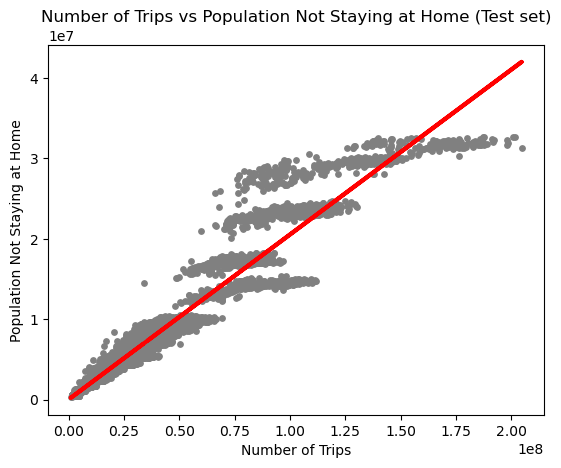

In [27]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Trips vs Population Not Staying at Home (Test set)')
plot_test.xlabel('Number of Trips')
plot_test.ylabel('Population Not Staying at Home')
plot_test.show()

<font size="3"> The regression line fits very well for Number of Trips under 75 million and the Population around 10 million. After that benchmark, there is too much above and below the line. 

In [28]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [29]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20506395]]
Mean squared error:  1761124185258.284
R2 score:  0.9444639792589795


In [30]:
y_predicted

array([[6822456.56027236],
       [3202123.15025141],
       [3621448.36360107],
       ...,
       [8670463.3049576 ],
       [5363219.27072242],
       [7446791.37684891]])

In [31]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5517088.0,6.822457e+06
1,3492026.0,3.202123e+06
2,3649008.0,3.621448e+06
3,1031910.0,7.555491e+05
4,15993942.0,1.323645e+07
5,451124.0,5.331078e+05
6,4764061.0,4.937493e+06
7,3061405.0,2.958375e+06
8,3570046.0,3.996385e+06
9,953084.0,7.568992e+05


<font size="3"> The MSE has a difference in the trillions! This makes sense given the large number variables outside of the regression line. Visually, the model did not look like a good fit and the MSE supports this conclusion. The high R2 score indicates a really strong correlation within the data. However, based off the large difference between Actual and Predicated outputs, there is too much variation for the model to predict how the number of individuals travelling would result in number of trips they take. 

In [32]:
# Reducing the 'Population Not Staying at Home' to under 10 million to rerun the model.

df_state_reduced=df_state_pop[df_state_pop['Population Not Staying at Home'] < 10000000]

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df_state_reduced['Number of Trips'].values.reshape(-1,1)
y2 = df_state_reduced['Population Not Staying at Home'].values.reshape(-1,1)

In [34]:
# Split data into a training set and a test set.

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [35]:
# Create a regression object.

regression2 = LinearRegression()  

In [36]:
regression2.fit(X2_train, y2_train)

LinearRegression()

In [37]:
# Predict the values of y using X.

y2_predicted = regression2.predict(X2_test)

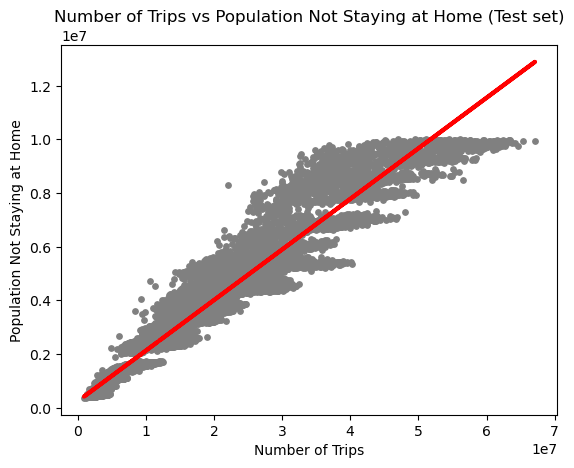

In [38]:
# Create a plot that shows the regression line from the model on the test set.

plot_test2 = plt
plot_test2.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test2.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test2.title('Number of Trips vs Population Not Staying at Home (Test set)')
plot_test2.xlabel('Number of Trips')
plot_test2.ylabel('Population Not Staying at Home')
plot_test2.show()

<font size="3"> Now that the population has been reduced to under 10 million, the regression line is fairly centered between the variables. However, there is still a lot of variation in number of trips. Most likely, this model will similar to the first one, but with a smaller number MSE value.

In [39]:
# Create objects that contain the model summary statistics.

rmse_2 = mean_squared_error(y2_test, y2_predicted) 
r2_2 = r2_score(y2_test, y2_predicted) 

In [40]:
# Print the model summary statistics.

print('Slope:' ,regression2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[0.18837173]]
Mean squared error:  386159396518.332
R2 score:  0.9418111846679954


<font size="3"> MSE was reduced by a little less than 1.4 trillion due to less variance under 10 million mark. Again, the model is not a good fit due to the large number of variables outside of the regression line. Ultimately, predicting number of trips based off the number of people travelling isn't possible with this data set. 

In [41]:
# Export Visualizations

plot_test.figure.savefig(os.path.join(path, '05 Visualizations', 'plot_test.png'))
plot_test2.figure.savefig(os.path.join(path, '05 Visualizations', 'plot_test2.png'))

AttributeError: 'function' object has no attribute 'savefig'